# SHORTEST JOB FIRST IMPLEMENTATION 

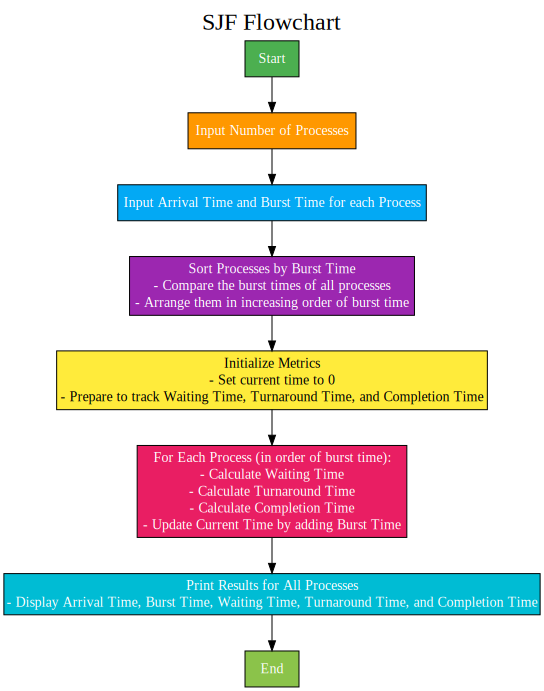

In [1]:
from IPython.display import SVG, display

image_path = r"C:\Users\saim\SJF_Flowchart.svg"

display(SVG(filename=image_path))

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>SJF Scheduling Algorithm</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        h1 {
            color: #4CAF50;
        }
        .key-points {
            background-color: #f9f9f9;
            border-left: 5px solid #4CAF50;
            padding: 10px;
            margin-bottom: 20px;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-bottom: 20px;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #4CAF50;
            color: white;
        }
    </style>
</head>
<body>
    <h1>Shortest Job First (SJF) Scheduling Algorithm</h1>
    <div class="key-points">
        <strong>Non-Preemptive:</strong> Executes the shortest job next.<br>
        <strong>Order:</strong> Processes sorted by burst time.<br>
        <strong>Waiting Time:</strong> Time a process waits in the queue before execution.<br>
        <strong>Turnaround Time:</strong> Total time from arrival to completion.<br>
        <strong>Completion Time:</strong> Time when the process finishes.
    </div>
    <h2>Example</h2>
    <table>
        <tr>
            <th>Process</th>
            <th>Arrival Time</th>
            <th>Burst Time</th>
        </tr>
        <tr>
            <td>P1</td>
            <td>0</td>
            <td>4</td>
        </tr>
        <tr>
            <td>P2</td>
            <td>1</td>
            <td>3</td>
        </tr>
        <tr>
            <td>P3</td>
            <td>2</td>
            <td>1</td>
        </tr>
    </table>
    <p><strong>Execution Order:</strong> P3 → P2 → P1</p>
</body>
</html>


In [5]:
num_pro = int(input("Enter the number of processes: "))
Process = {}
for i in range(num_pro):
    process_id = f"P{i+1}"
    arrival_time = int(input(f"Enter the Arrival time for Process_id P{i+1}: "))
    burst_time = int(input(f"Enter the Burst time for Process_id P{i+1}: "))
    Process[process_id] = [arrival_time, burst_time]

# Sorting based on arrival time initially
sorted_process = sorted(Process.items(), key=lambda item: item[1][0])

waiting_time = {}
turnaround_time = {}
completion_time = {}
current_time = 0
remaining_processes = sorted_process.copy()

while remaining_processes:
    # Select the process with the shortest burst time among those that have arrived
    available_processes = [proc for proc in remaining_processes if proc[1][0] <= current_time]
    
    if available_processes:
        # Find the process with the shortest burst time
        shortest_job = min(available_processes, key=lambda x: x[1][1])
        process_id, (arrival, burst) = shortest_job
        remaining_processes.remove(shortest_job)
        
        completion_time[process_id] = current_time + burst
        turnaround_time[process_id] = completion_time[process_id] - arrival
        waiting_time[process_id] = turnaround_time[process_id] - burst
        current_time = completion_time[process_id]
    else:
        # If no process is available to run, move time forward to the next process arrival
        current_time = min(remaining_processes, key=lambda x: x[1][0])[1][0]

avg_waiting_time = sum(waiting_time.values()) / num_pro
avg_turnaround_time = sum(turnaround_time.values()) / num_pro


print("***********************************************************************************************************************")

print("SHORTEST JOB FIRST IMPLEMENTATION")

print("\nProcess ID | Arrival Time | Burst Time | Completion Time | Turnaround Time | Waiting Time")
for process_id in sorted(Process.keys(), key=lambda pid: Process[pid][0]):
    print(f"{process_id}       | {Process[process_id][0]}            | {Process[process_id][1]}         |     {completion_time[process_id]}       | {turnaround_time[process_id]}             |  {waiting_time[process_id]} ")

print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")
print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")
print(f"Average Response Time: {avg_waiting_time:.2f}")

Enter the number of processes: 4
Enter the Arrival time for Process_id P1: 1
Enter the Burst time for Process_id P1: 3
Enter the Arrival time for Process_id P2: 2
Enter the Burst time for Process_id P2: 4
Enter the Arrival time for Process_id P3: 1
Enter the Burst time for Process_id P3: 2
Enter the Arrival time for Process_id P4: 4
Enter the Burst time for Process_id P4: 4
***********************************************************************************************************************
SHORTEST JOB FIRST IMPLEMENTATION

Process ID | Arrival Time | Burst Time | Completion Time | Turnaround Time | Waiting Time
P1       | 1            | 3         |     6       | 5             |  2 
P3       | 1            | 2         |     3       | 2             |  0 
P2       | 2            | 4         |     10       | 8             |  4 
P4       | 4            | 4         |     14       | 10             |  6 

Average Waiting Time: 3.00
Average Turnaround Time: 6.25
Average Response Time: 3.00


In [6]:
Process

{'P1': [1, 3], 'P2': [2, 4], 'P3': [1, 2], 'P4': [4, 4]}

In [7]:
print(f"Waiting Time : {waiting_time},\nTurn Around Time : {turnaround_time},\nCompletion Time : {completion_time}")

Waiting Time : {'P3': 0, 'P1': 2, 'P2': 4, 'P4': 6},
Turn Around Time : {'P3': 2, 'P1': 5, 'P2': 8, 'P4': 10},
Completion Time : {'P3': 3, 'P1': 6, 'P2': 10, 'P4': 14}
